In [61]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import beta

from collections import defaultdict
from IPython.core.pylabtools import figsize
figsize(12, 6)

seed = 42
np.random.seed(seed)

In [83]:
class Simulation:  
    
    def __init__(self, G):
        # start simulation
#         self.id = id
        self.graph = None
        self.avg_mode = []
        self.avg_var  = []
        self.history = defaultdict()  
        self.make_agent_graph(G)
    
    def make_agent_graph(self, input_graph):
        G = nx.Graph()
        # bx_node = {u:d for u,d in bt.nodes(data=True)}
        bx_node = [(u, d) for (u,d) in input_graph.nodes(data=True)]
        # print(bx_node)
        mt = defaultdict() #mapping table
        for item in bx_node:
            node_id = item[0]
            #checks if graph already contains alpha/beta
            if 'alpha' in item[1]: 
                node_alpha = item[1]['alpha']
                node_beta  = item[1]['beta']
                node = Agent(node_id, alpha= node_alpha, beta = node_beta)
            node = Agent(node_id)
            mt[node_id] = node
            node.compute_mode()
            G.add_node(node)

        bx_edge = [(mt[u], mt[v], d) for (u,v,d) in input_graph.edges(data=True)]
        G.add_edges_from(bx_edge)
        self.graph = G
    
    
    def draw_network(self):
        #TODO: transparency based on distribution variance
        G = self.graph
        labels = {u:u.id for u in G.nodes()}
        modes = [u.compute_mode() for (u,d) in G.nodes(data=True)]

        print(modes)
        fig, ax = plt.subplots()
        ax.axis('off')
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, node_size=400, alpha=0.8,
                               node_color=modes, cmap=plt.cm.cool)


        nx.draw_networkx_edges(G, pos, edge_color='w')
        nx.draw_networkx_labels(G,pos,labels,font_size=14)
        plt.show()

    def draw_history(self):
        fig, ax = plt.subplots(figsize=(15, 5))
        time = np.arange(1000)
        plt.plot(time, self.avg_mode)
        fig, ax = plt.subplots(figsize=(15, 5))
        plt.plot(time, self.avg_var, 'r')
        plt.show()


    
    def run_simulation(self, iterations=1000):
        nodes = [u for (u,d) in self.graph.nodes(data=True)]

        for i in range(iterations):
            self.avg_mode.append(np.mean([u.compute_mode() for (u,d) in \
                                   self.graph.nodes(data=True)]) )
            self.avg_var.append( np.mean([u.compute_var() for (u,d) in \
                                   self.graph.nodes(data=True)]) )
            nodes_order = np.random.permutation(nodes)

            for sender in nodes_order:
                sender_edges = [i for i in self.graph.neighbors(sender)]
                receiver = np.random.choice(sender_edges)
                if sender.compute_mode() < np.random.rand(1):
                    receiver.alpha += 1
                else:
                    receiver.beta += 1
                    
        for u in self.graph.nodes(data=True):
            print(u)
    


In [84]:
class Agent:
    def __init__(self, id, alpha=2, beta=2):
        self.id = id
        self.alpha = alpha
        self.beta = beta
    
    def __str__(self):
        return "<id: %s, alpha: %s, beta: %s>" % (self.id, self.alpha, self.beta)
#         return str(self.id)
    
    def __repr__(self):
        return "<id: %s, alpha: %s, beta: %s>" % (self.id, self.alpha, self.beta)
#         return str(self.id)
        
    def compute_mode(self):
        return (self.alpha - 1) / (self.alpha + self.beta - 2)

    def compute_var(self):
        try: return (self.alpha*self.beta) \
        / (((self.alpha+self.beta)**2) * (self.alpha+self.beta+1) )
        except ZeroDivisionError: return 10

In [85]:
bx = nx.binomial_graph(n=13, p=0.3, seed=42)
# nx.draw(bx, with_labels=True)
# plt.show()

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


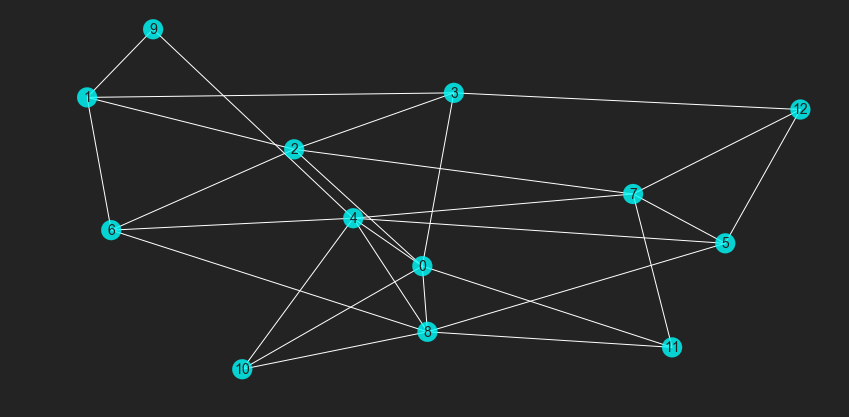

In [86]:
sim = Simulation(bx)

sim.draw_network()

In [89]:
sim.run_simulation()

(<id: 0, alpha: 1575, beta: 1328>, {})
(<id: 1, alpha: 1277, beta: 1144>, {})
(<id: 2, alpha: 1108, beta: 1130>, {})
(<id: 3, alpha: 913, beta: 985>, {})
(<id: 4, alpha: 1889, beta: 1762>, {})
(<id: 5, alpha: 826, beta: 840>, {})
(<id: 6, alpha: 731, beta: 788>, {})
(<id: 7, alpha: 1241, beta: 1343>, {})
(<id: 8, alpha: 1444, beta: 1428>, {})
(<id: 9, alpha: 374, beta: 442>, {})
(<id: 10, alpha: 451, beta: 522>, {})
(<id: 11, alpha: 527, beta: 560>, {})
(<id: 12, alpha: 750, beta: 674>, {})


[0.5425715270596346, 0.5274906986357999, 0.4950805008944544, 0.4810126582278481, 0.5174020279528638, 0.4957932692307692, 0.4812129202373105, 0.48024786986831913, 0.502787456445993, 0.4582309582309582, 0.46343975283213185, 0.4847926267281106, 0.5267229254571026]


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


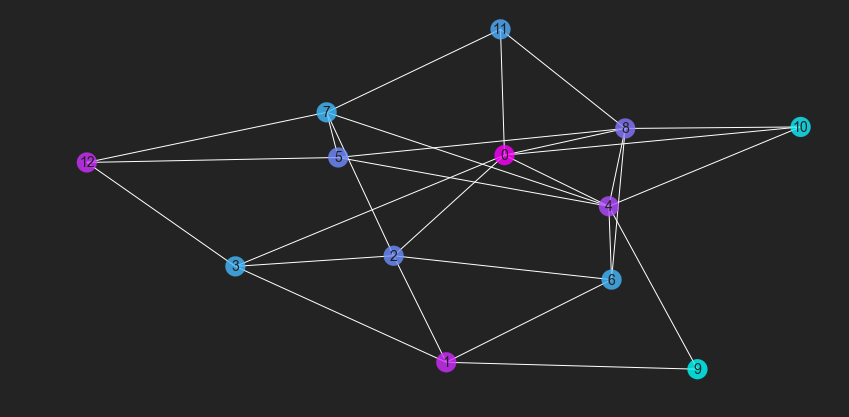

In [90]:
sim.draw_network()

In [91]:
len(sim.avg_mode)

2000

In [70]:
nodes = [u for (u,d) in sim.graph.nodes(data=True)]
print(nodes)


[<id: 0, alpha: 2, beta: 2>, <id: 1, alpha: 2, beta: 2>, <id: 2, alpha: 2, beta: 2>, <id: 3, alpha: 2, beta: 2>, <id: 4, alpha: 2, beta: 2>, <id: 5, alpha: 2, beta: 2>, <id: 6, alpha: 2, beta: 2>, <id: 7, alpha: 2, beta: 2>, <id: 8, alpha: 2, beta: 2>, <id: 9, alpha: 2, beta: 2>, <id: 10, alpha: 2, beta: 2>, <id: 11, alpha: 2, beta: 2>, <id: 12, alpha: 2, beta: 2>]


In [71]:
for u in sim.graph.nodes(data=True):
    print(u)

(<id: 0, alpha: 2, beta: 2>, {})
(<id: 1, alpha: 2, beta: 2>, {})
(<id: 2, alpha: 2, beta: 2>, {})
(<id: 3, alpha: 2, beta: 2>, {})
(<id: 4, alpha: 2, beta: 2>, {})
(<id: 5, alpha: 2, beta: 2>, {})
(<id: 6, alpha: 2, beta: 2>, {})
(<id: 7, alpha: 2, beta: 2>, {})
(<id: 8, alpha: 2, beta: 2>, {})
(<id: 9, alpha: 2, beta: 2>, {})
(<id: 10, alpha: 2, beta: 2>, {})
(<id: 11, alpha: 2, beta: 2>, {})
(<id: 12, alpha: 2, beta: 2>, {})


(<id: 0, alpha: 755, beta: 741>, {})
(<id: 1, alpha: 609, beta: 575>, {})
(<id: 2, alpha: 549, beta: 540>, {})
(<id: 3, alpha: 473, beta: 476>, {})
(<id: 4, alpha: 993, beta: 869>, {})
(<id: 5, alpha: 462, beta: 391>, {})
(<id: 6, alpha: 355, beta: 389>, {})
(<id: 7, alpha: 573, beta: 675>, {})
(<id: 8, alpha: 776, beta: 727>, {})
(<id: 9, alpha: 194, beta: 208>, {})
(<id: 10, alpha: 219, beta: 275>, {})
(<id: 11, alpha: 268, beta: 254>, {})
(<id: 12, alpha: 341, beta: 365>, {})


[0.5046854082998661, 0.5143824027072758, 0.5041398344066237, 0.498416050686378, 0.5333333333333333, 0.5417156286721504, 0.477088948787062, 0.4590690208667737, 0.5163224516988674, 0.4825, 0.44308943089430897, 0.5134615384615384, 0.48295454545454547]


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


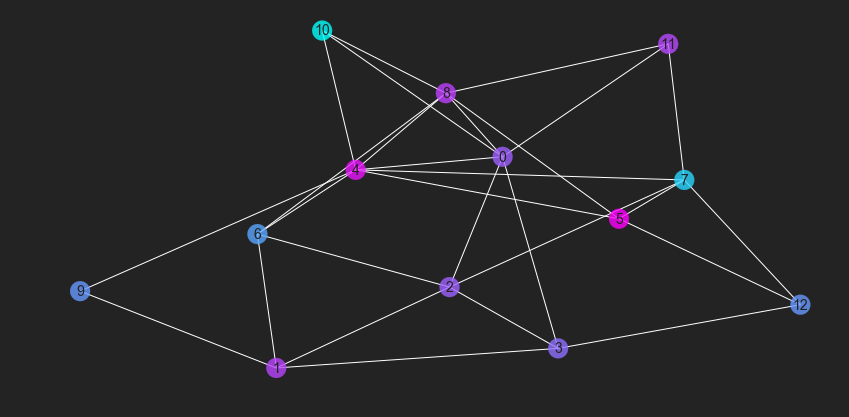

In [73]:
sim.draw_network()


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


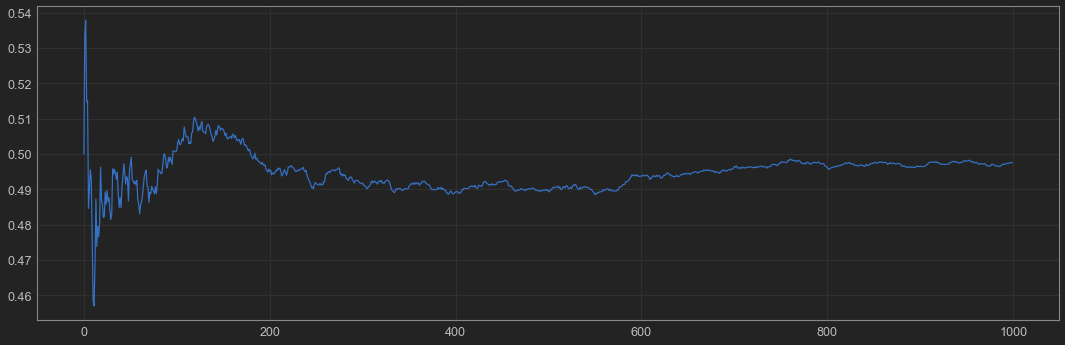

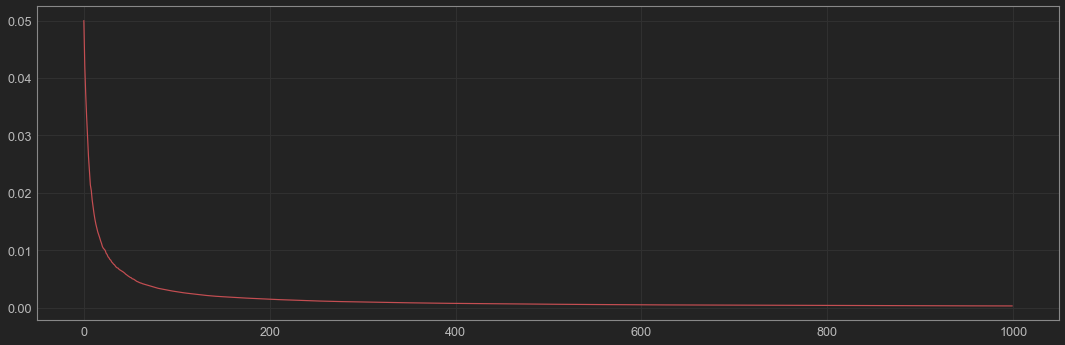

In [14]:
# What do I need to save in each iteration?
# Summary statistics for the network on the whole
# Average Mode
# Variance
# Rate of Communication
# We effectively want to make the entire graph directional at any iteration
# Random initialization, who begins the conversation is random